In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = sns.load_dataset("mpg").drop("name", axis = 1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [3]:
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [5]:
df.query("horsepower.isna()")

# impute values in exercise

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [6]:
df[df["horsepower"].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [7]:
df.dropna(axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


<AxesSubplot:title={'center':'Model year'}>

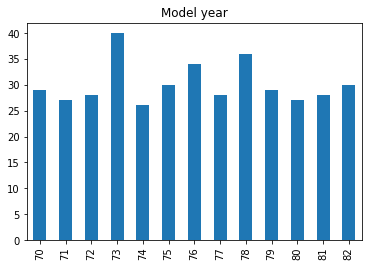

In [11]:
df["model_year"].value_counts().sort_index().plot(kind = "bar", title  = "Model year")

In [13]:
bins = pd.IntervalIndex.from_tuples([(69, 73), (74, 77), (78, 82)])

df["model_year"] = pd.cut(df["model_year"], bins = bins)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,"(69, 73]",usa
1,15.0,8,350.0,165.0,3693,11.5,"(69, 73]",usa
2,18.0,8,318.0,150.0,3436,11.0,"(69, 73]",usa
3,16.0,8,304.0,150.0,3433,12.0,"(69, 73]",usa
4,17.0,8,302.0,140.0,3449,10.5,"(69, 73]",usa


In [15]:
df = pd.get_dummies(df, columns = ["model_year", "origin"], drop_first = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(74, 77]","model_year_(78, 82]",origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# OBS! .values för att göra om till nparray
X, y = df.drop("mpg", axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((274, 9), (118, 9))

## Multiple linear regression

In [18]:
from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()
model_lin_reg.fit(scaled_X_train, y_train)

intercept, coefficients = model_lin_reg.intercept_, model_lin_reg.coef_

intercept, coefficients

(23.637591240875913,
 array([-0.07963534,  0.71698622, -1.5802261 , -4.49219087, -0.08849455,
         0.36793355,  2.76523073,  0.02957218, -1.25074873]))

## ANN

* shallow MLP

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD

model_shallow = Sequential(name = "Shallow_network")
model_shallow.add(InputLayer(X_train.shape[1]))
model_shallow.add(Dense(1, name = "Output_layer")) # OBS! Ingen aktiveringsfunktion -> linjär aktivering
model_shallow.compile(loss = "mean_squared_error", optimizer = SGD(learning_rate = .01))
model_shallow.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-19 22:26:20.654682: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-19 22:26:20.654829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "Shallow_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Output_layer (Dense)        (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_shallow.fit(scaled_X_train, y_train, epochs = 50, verbose = 1, validation_data = (scaled_X_test, y_test))

Epoch 1/50


2022-04-19 22:29:16.032485: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-19 22:29:16.142843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 18ms/step - loss: 526.3851 - val_loss: 377.1352
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 355.5860 - val_loss: 256.7983
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 248.2266 - val_loss: 177.0919
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 176.2773 - val_loss: 123.8548
Epoch 5/50
1/9 [==>...........................] - ETA: 0s - loss: 134.3335

2022-04-19 22:29:17.018492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 5ms/step - loss: 126.8204 - val_loss: 86.7361
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 91.4968 - val_loss: 61.4549
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 67.5138 - val_loss: 44.5774
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 50.8124 - val_loss: 32.5952
Epoch 9/50
9/9 [==============================] - 0s 5ms/step - loss: 38.9028 - val_loss: 24.5306
Epoch 10/50
9/9 [==============================] - 0s 5ms/step - loss: 30.6553 - val_loss: 19.2834
Epoch 11/50
9/9 [==============================] - 0s 5ms/step - loss: 25.0110 - val_loss: 15.6818
Epoch 12/50
9/9 [==============================] - 0s 5ms/step - loss: 21.0190 - val_loss: 13.5306
Epoch 13/50
9/9 [==============================] - 0s 5ms/step - loss: 18.2852 - val_loss: 11.8535
Epoch 14/50
9/9 [==============================] - 0s 5ms/step - loss: 16.3430 - val_loss: 10.9092
Epoch 15/50
9/9 [========

In [24]:
df_loss = pd.DataFrame(model_shallow.history.history)
df_loss.head()

,loss,val_loss
0,526.385071,377.135162
1,355.585968,256.798340
2,248.226639,177.091949
3,176.277344,123.854813
4,126.820427,86.736099


In [25]:
df_loss.index = range(1, len(df_loss) + 1)
df_loss.head()

,loss,val_loss
1,526.385071,377.135162
2,355.585968,256.798340
3,248.226639,177.091949
4,176.277344,123.854813
5,126.820427,86.736099


<AxesSubplot:xlabel='Epochs', ylabel='MSE loss'>

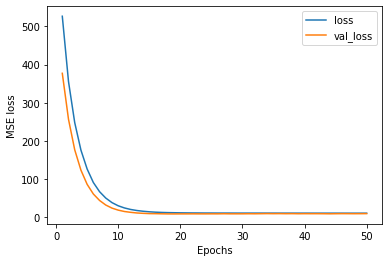

In [26]:
df_loss.plot(xlabel = "Epochs", ylabel = "MSE loss")

In [27]:
weights, bias = model_shallow.layers[0].get_weights()

print(f"Linear reg: {intercept=}, {coefficients=}")
print(f"ANN: {bias=}, {weights=}")

Linear reg: intercept=23.637591240875913, coefficients=array([-0.07963534,  0.71698622, -1.5802261 , -4.49219087, -0.08849455,
        0.36793355,  2.76523073,  0.02957218, -1.25074873])
ANN: bias=array([23.644358], dtype=float32), weights=array([[-0.4963924 ],
       [-0.29700342],
       [-1.6344284 ],
       [-3.30655   ],
       [-0.2635439 ],
       [ 0.26139894],
       [ 2.6423256 ],
       [ 0.2400341 ],
       [-0.98229825]], dtype=float32)


## Prediction and evaluation

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_ANN = model_shallow.predict(scaled_X_test)
y_pred_lin_reg = model_lin_reg.predict(scaled_X_test)

print(f"MAE, RMSE for ANN: ")
print(mean_absolute_error(y_test, y_pred_ANN), np.sqrt(mean_squared_error(y_test, y_pred_ANN)))

print(f"MAE, RMSE for lin reg:")
print(mean_absolute_error(y_test, y_pred_lin_reg), np.sqrt(mean_squared_error(y_test, y_pred_lin_reg)))

MAE, RMSE for ANN: 
2.5586495108523604 3.183606759139227
MAE, RMSE for lin reg:
2.52233354282375 3.121220234936093
